-3.1354942159291492 0.32643490981377116 4.605170185988091


Text(0, 0.5, 'Logrithm or Approximation Value')

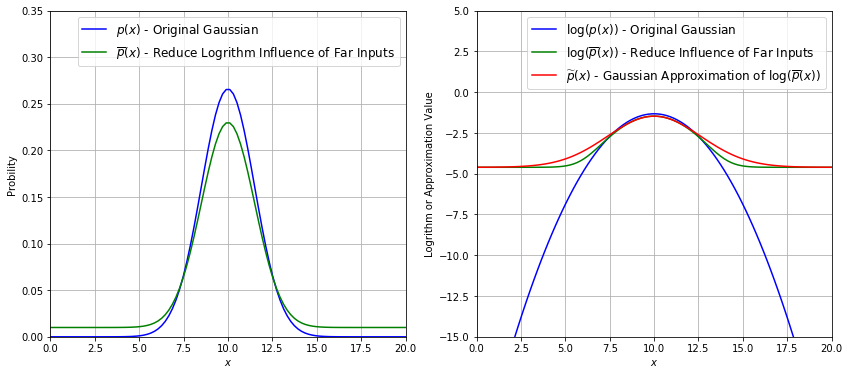

In [86]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from math import log, exp
%matplotlib inline

def linep(x, mean, std, c1, c2):
    return [c1 * exp(-0.5 * ((i - mean) / std) ** 2) + c2 for i in x]

def tildep(x, mean, std, c1, c2):
    d3 = -log(c2)
    d1 = -log(c1 + c2) - d3
    d2 = -2 * log((-log(c1 * exp(-0.5) + c2) - d3) / d1)
    print(d1, d2, d3)
    return [-d1 * exp(-0.5 * d2 * ((i - mean) / std) ** 2) - d3 for i in x]

fig = plt.figure(figsize=(14, 6))
x_min, x_max = 0, 20
ax = fig.add_subplot(121)
mean, std = 10.0, 1.5
c1, c2 = 0.22, 0.01
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x, mean, std)
y2 = linep(x, mean, std, c1, c2)
ax.plot(x, y, 'b', label='$p(x)$ - Original Gaussian')
ax.plot(x, y2, 'g', label='$\overline{p}(x)$ - Reduce Logrithm Influence of Far Inputs')
ax.grid()
ax.legend(fontsize=12)
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 0.35)
ax.set_xlabel('$x$')
ax.set_ylabel('Probility')

ax = fig.add_subplot(122)
ax.plot(x, [log(i) for i in y], 'b', label=r'$\log(p(x))$ - Original Gaussian')
ax.plot(x, [log(i) for i in y2], 'g', label=r'$\log(\overline{p}(x))$ - Reduce Influence of Far Inputs')
y3 = tildep(x, mean, std, c1, c2)
ax.plot(x, y3, 'r', label=r'$\widetilde{p}(x)$ - Gaussian Approximation of $\log(\overline{p}(x))$')
ax.grid()
ax.legend(fontsize=12)
ax.set_xlim(x_min, x_max)
ax.set_ylim(-15, 5)
ax.set_xlabel('$x$')
ax.set_ylabel('Logrithm or Approximation Value')